# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('data/tennis.csv')
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,4.0,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True


In [3]:
df = df.dropna()
x = pd.get_dummies(df['surface'], drop_first = True)
#indoor carpet dropped
y = df['player1 total points won']
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     12.68
Date:                      Wed, 20 Jan 2021   Prob (F-statistic):           4.51e-10
Time:                              20:57:42   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.596     23.147      0.000      76.172      90.284
Indoor: Hard      -6.1456      4.090     -1.503      0.133     -14.171       1.880
Outdoor: Clay      4.8599      4.042      1.202      0.230      -3.073      12.792
Outdoor: Grass    15.4655      4.344      3.560      0.000       6.941      23.990
Outdoor: Hard      4.5908      3.829      1.199      0.231      -2.923      12.105
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#No constant
df = df.dropna()
x1 = pd.get_dummies(df['surface'])
#indoor carpet dropped
y = df['player1 total points won']
#X = sm.add_constant(x)
est = sm.OLS(y, x1).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     12.68
Date:                      Wed, 20 Jan 2021   Prob (F-statistic):           4.51e-10
Time:                              20:57:42   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Carpet    83.2281      3.596     23.147      0.000      76.172      90.284
Indoor: Hard      77.0825      1.949     39.549      0.000      73.258      80.907
Outdoor: Clay     88.0880      1.847     47.690      0.000      84.463      91.713
Outdoor: Grass    98.6935      2.438     40.484      0.000      93.910     103.477
Outdoor: Hard     87.8188      1.317     66.690      0.000      85.235      90.403
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
'''
Question 1.1: (used data with constant)
Federer scored more points on all surfaces that was not indoor carpet, except indoor hard. The standard errors are slightly high and the t-test shows that our data is not significant for all except the outdoor grass. On average, Federer scores 83 points on the indoor carpet surface.

Question 1.2:
As we can see above, the R-squared value does not change when the constant is added. The data does change slightly, however. It seems that Federer generally won more points on all outdoor courts compared to indoor carpet, but that he scored fewer points on indoor hard. The issue is that the p-values are not significant for any of the surfaces except grass. Therefore, for the t-test below, we will compare the outdoor grass to any of the other surfaces to see if the surface truly makes a difference in how well Federer plays.
'''

'\nQuestion 1.1: (used data with constant)\nFederer scored more points on all surfaces that was not indoor carpet, except indoor hard. The standard errors are slightly high and the t-test shows that our data is not significant for all except the outdoor grass. On average, Federer scores 83 points on the indoor carpet surface.\n\nQuestion 1.2:\nAs we can see above, the R-squared value drops significantly when the constant is added. However, the data in the first dataframe was also uncentered and therefore it is unclear how useful it was. Also, the data for the indoor carpet was not present on the data that did not have a constant and therefore the data was simply comparing the total points won to the surface, but not to the original surface that was placed in the data.\n'

In [6]:
from scipy.stats import ttest_ind_from_stats

z = x.dropna()
surf1m = z['Indoor: Hard'].dropna().mean()
surf2m = z['Outdoor: Grass'].dropna().mean()
surf1std = z['Indoor: Hard'].dropna().std()
surf2std = z['Outdoor: Grass'].dropna().std()

ttest_ind_from_stats(mean1=surf1m, std1=surf1std, nobs1=len(z['Indoor: Hard'].dropna()), mean2=surf2m, std2=surf2std, nobs2=len(z['Outdoor: Grass'].dropna()))

Ttest_indResult(statistic=4.291291977516553, pvalue=1.8598804960553146e-05)

In [ ]:
#We see that the p-value is extremely small and therefore the statistics are significant. Federer makes more points on the outdoor grass court than any other court.

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
#Linear Data Sex and Class Unrelated
sex = pd.get_dummies(df['sex'], drop_first = True)

df_new1 = pd.concat((sex, classs), axis = 1)
titan1 = sm.add_constant(df_new1)
est1 = sm.OLS(df.survived, titan1).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.04e-88
Time:                        20:57:43   Log-Likelihood:                -417.70
No. Observations:                 891   AIC:                             843.4
Df Residuals:                     887   BIC:                             862.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.017     34.666      0.000       0.543       0.609
male          -0.5163      0.027    -18.814      0.000      -0.570      -0.462
First          0.3452      0.022     15.940      0.000       0.303       0.388
Second         0.1998      0.023      8.653      0.000       0.154       0.245
Third          0.0311      0.018      1.767      0.078      -0.003       0.066
==============================================================================
Omnibus:                       41.418   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.281
Skew:                           0.557   Prob(JB):                     8.92e-11
Kurtosis:                       3.081   Cond. No.                     1.75e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
#Linear Data Gender_Class Together

df['gender_class'] = df.sex.astype(str) + '_' + df['class'].astype(str)

sm.OLS(
    df.survived,
    sm.add_constant(
        pd.get_dummies(df['gender_class'], drop_first=True)
    )
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     114.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.32e-93
Time:                        20:57:43   Log-Likelihood:                -399.13
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     885   BIC:                             839.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9681      0.039     24.700      0.000       0.891       1.045
female_Second    -0.0470      0.059     -0.802      0.423      -0.162       0.068
female_Third     -0.4681      0.050     -9.290      0.000      -0.567      -0.369
male_First       -0.5992      0.052    -11.490      0.000      -0.702      -0.497
male_Second      -0.8107      0.054    -15.124      0.000      -0.916      -0.705
male_Third       -0.8326      0.044    -18.845      0.000      -0.919      -0.746
==============================================================================
Omnibus:                       80.766   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.275
Skew:                           0.817   Prob(JB):                     1.02e-22
Kurtosis:                       3.247   Cond. No.                         8.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
'''
Question 2.1:
I chose the data with class and gender as that encompasses more data and the R-squared was slightly higher (0.393) compared the analysis of class and sex alone (0.368).

Question 2.2:
From what we can see in the first est summary, more men (adult_male) died than women overall. This makes sense because at the time of the sinking, women and children were saved first. More first class passengers survived than other classes,which also makes sense because they were made aware of the sinking situation earlier than other classes. Lower class passengers were also blocked off to allow first class passengers to board first.
'''

"\nQuestion 2.1:\nI chose the data with class and adult_men as that encompasses more data (age and sex simultaneously) and the R-squared was slightly higher (0.393) compared the analysis of class and sex alone (0.368).\n\nQuestion 2.2:\nFrom what we can see in the first est summary, more men (adult_male) died than women. This makes sense because at the time of the sinking, women and children were saved first. More first class passengers survived than other classes, which also makes sense because they might have paid the ship's crew to allow them onto a lifeboat. \n"

0.39317914367906703


Text(0, 0.5, 'Regularized Gender_Class')

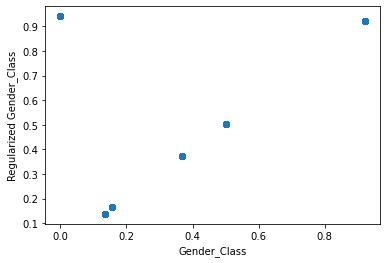

In [16]:
#Help from Pam
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scipy

#Regularized Data Gender_Class

titanic_x = pd.get_dummies(df['gender_class'], drop_first=True)
titanic_y = df['survived']

titanic_model1 = sm.OLS(titanic_y,titanic_x).fit(alpha = 0.5)
titanic_prediction1 = titanic_model1.predict(titanic_x)
clf = Ridge(alpha=1.0)
clf.fit(titanic_x, titanic_y)
y_prediction_regularized = clf.predict(titanic_x)
titanic_prediction_reg = titanic_model1.predict(titanic_x)
r2 = r2_score(titanic_y,y_prediction_regularized)
print(r2)

plt.scatter(titanic_prediction1, y_prediction_regularized)

plt.xlabel("Gender_Class")
plt.ylabel("Regularized Gender_Class")

In [ ]:
#Since the R-Squared value for both the regularized and normal data are more or less the same (0.393 vs. 0.394), the data points line up nicely (except the regularized gender_class point at 1). There is a linear relation between the values.

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('data/house_price.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [19]:
df = df.dropna(axis = 1) #dropping any columns that have na in them
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [21]:
#By fluke, I got a good R-squared value (0.819) when I combined the size of the garage and the number of cars that can fit in the garage and saw how valid the prices of the houses are based on that alone. Clearly, you should buy a house based on these 2 qualities!
df['Garage'] = df.GarageCars.astype(str) + '_' + df['GarageArea'].astype(str)

y = df.SalePrice
gar = pd.get_dummies(df['Garage'], drop_first = True)
Xg = sm.add_constant(gar)

est = sm.OLS(y, Xg).fit()

est.summary()

052e+05   4.18e+04      2.519      0.012    2.32e+04    1.87e+05
2_550       1.265e+05   1.54e+04      8.228      0.000    9.64e+04    1.57e+05
2_551       8.218e+04   2.97e+04      2.767      0.006    2.39e+04     1.4e+05
2_552       9.213e+04   2.13e+04      4.335      0.000    5.04e+04    1.34e+05
2_554       1.285e+05   2.97e+04      4.327      0.000    7.02e+04    1.87e+05
2_555       8.158e+04   4.18e+04      1.954      0.051    -354.593    1.64e+05
2_556       1.554e+05   2.97e+04      5.233      0.000    9.71e+04    2.14e+05
2_558       1.227e+05   4.18e+04      2.938      0.003    4.07e+04    2.05e+05
2_560       5.056e+04   2.13e+04      2.379      0.018    8846.367    9.23e+04
2_562       1.026e+05   4.18e+04      2.458      0.014    2.07e+04    1.85e+05
2_564       1.079e+05   1.33e+04      8.088      0.000    8.17e+04    1.34e+05
2_565       8.868e+04   2.97e+04      2.986      0.003    3.04e+04    1.47e+05
2_566       7.668e+04   2.97e+04      2.582      0.010    1.84e+04    1.35e+05
2_567       2.602e+05   2.97e+04      8.759      0.000    2.02e+05    3.18e+05
2_569       1.341e+05   2.97e+04      4.516      0.000    7.58e+04    1.92e+05
2_570       8.668e+04   4.18e+04      2.076      0.038    4745.407    1.69e+05
2_572       5.199e+04   1.39e+04      3.738      0.000    2.47e+04    7.93e+04
2_573       8.618e+04   2.97e+04      2.901      0.004    2.79e+04    1.44e+05
2_574       9.013e+04   2.97e+04      3.034      0.002    3.18e+04    1.48e+05
2_575       1.077e+05   2.97e+04      3.625      0.000    4.94e+04    1.66e+05
2_576       6.031e+04   7609.187      7.926      0.000    4.54e+04    7.52e+04
2_577       1.066e+05   2.13e+04      5.013      0.000    6.48e+04    1.48e+05
2_578       1.066e+05   2.44e+04      4.371      0.000    5.88e+04    1.55e+05
2_582       1.102e+05   4.18e+04      2.639      0.008    2.82e+04    1.92e+05
2_583       1.119e+05   2.44e+04      4.585      0.000     6.4e+04     1.6e+05
2_586       1.542e+05   2.97e+04      5.191      0.000    9.59e+04    2.12e+05
2_588       7.817e+04   1.54e+04      5.083      0.000     4.8e+04    1.08e+05
2_590       1.647e+05   4.18e+04      3.944      0.000    8.27e+04    2.47e+05
2_592       1.687e+05   2.97e+04      5.681      0.000     1.1e+05    2.27e+05
2_595       7.968e+04   4.18e+04      1.908      0.057   -2254.593    1.62e+05
2_596       2.568e+04   4.18e+04      0.615      0.539   -5.63e+04    1.08e+05
2_598       1.216e+05   4.18e+04      2.912      0.004    3.96e+04    2.04e+05
2_600       5.267e+04   2.13e+04      2.478      0.013     1.1e+04    9.44e+04
2_601       7.318e+04   4.18e+04      1.753      0.080   -8754.593    1.55e+05
2_602       6.218e+04   4.18e+04      1.489      0.137   -1.98e+04    1.44e+05
2_603         1.1e+05   2.97e+04      3.704      0.000    5.17e+04    1.68e+05
2_604       1.382e+05   4.18e+04      3.310      0.001    5.62e+04     2.2e+05
2_605       8.378e+04   4.18e+04      2.007      0.045    1845.407    1.66e+05
2_606       1.097e+05   4.18e+04      2.627      0.009    2.77e+04    1.92e+05
2_608       1.267e+05   2.97e+04      4.265      0.000    6.84e+04    1.85e+05
2_610       2.367e+05   4.18e+04      5.669      0.000    1.55e+05    3.19e+05
2_611       6.768e+04   4.18e+04      1.621      0.105   -1.43e+04     1.5e+05
2_612       1.587e+05   2.97e+04      5.344      0.000       1e+05    2.17e+05
2_613       1.337e+05   4.18e+04      3.202      0.001    5.17e+04    2.16e+05
2_614       1.028e+05   2.97e+04      3.460      0.001    4.45e+04    1.61e+05
2_615       1.082e+05   2.44e+04      4.434      0.000    6.03e+04    1.56e+05
2_616       8.068e+04   4.18e+04      1.932      0.054   -1254.593    1.63e+05
2_617       2.147e+05   4.18e+04      5.143      0.000    1.33e+05    2.97e+05
2_618       1.297e+05   4.18e+04      3.106      0.002    4.77e+04    2.12e+05
2_619       1.577e+05   2.97e+04      5.309      0.000    9.94e+04    2.16e+05
2_620       1.537e+05   4.18e+04      3.681      0.000    7.17e+